# Convolution Neural Network

## 1. 데이터 불러오기

In [1]:
import numpy as np

In [2]:
X_train = np.load('x_train.npy')
Y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
Y_test = np.load('y_test.npy')

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

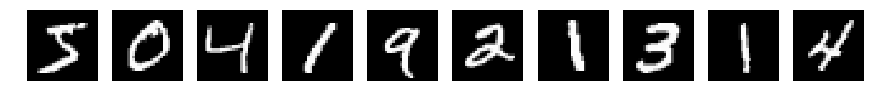

In [6]:
fig, ax = plt.subplots(1, 10, figsize = (15, 5))
for i in range(10):
    im = Image.fromarray(X_train[i, :, :])
    ax[i].axis('off')
    ax[i].imshow(im)

In [7]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## 2. 학습

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=42000)

/home/minjae/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

Using TensorFlow backend.
/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### 2.1 일반적인 Neural Network를 이용하여

In [10]:
X_train = X_train.reshape(42000, 28*28).astype('float32')/255.0
X_val = X_val.reshape(18000, 28*28).astype('float32')/255.0
X_test = X_test.reshape(10000, 28*28).astype('float32')/255.0

In [ ]:
X_train.shape

In [ ]:
X_train

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [20]:
in_dim = 28*28
out_dim = 10

model = Sequential()
model.add(Dense(units = 64, input_dim=in_dim, activation='relu'))
model.add(Dense(units = out_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_val, Y_val))

In [ ]:
fig, ax = plt.subplots(2, 1)

ax[0].set_yticklabels('Loss')
ax[0].plot(hist.history['loss'])
ax[0].plot(hist.history['val_loss'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xticklabels('Epochs')
ax[1].set_yticklabels('Accuracy')
ax[1].plot(hist.history['acc'])
ax[1].plot(hist.history['val_acc'])
ax[1].legend(['Training', 'Validation'])

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('Loss : '+str(loss))
print('Accuracy : '+str(accuracy))

### 2.2 CNN을 이용하여 학습

In [11]:
from keras import backend as K

In [12]:
img_row = 28
img_col = 28

if K.image_data_format()=='channels_first':
    shape_ord = (1, img_row, img_col)
else:
    shape_ord = (img_row, img_col, 1)


In [13]:
X_train = X_train.reshape((X_train.shape[0], )+shape_ord)
X_val = X_val.reshape((X_val.shape[0], )+shape_ord)
X_test = X_test.reshape((X_test.shape[0], )+shape_ord)

In [14]:
X_train.shape

(42000, 28, 28, 1)

In [15]:
shape_ord

(28, 28, 1)

In [16]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Flatten

In [21]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=True, input_shape=shape_ord, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(units=out_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 324)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3250      
Total params: 3,354
Trainable params: 3,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_val, Y_val))

In [ ]:
fig, ax = plt.subplots(2, 1)

ax[0].set_yticklabels('Loss')
ax[0].plot(hist.history['loss'])
ax[0].plot(hist.history['val_loss'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xticklabels('Epochs')
ax[1].set_yticklabels('Accuracy')
ax[1].plot(hist.history['acc'])
ax[1].plot(hist.history['val_acc'])
ax[1].legend(['Training', 'Validation'])

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print('Loss : '+str(loss))
print('Accuracy : '+str(accuracy))